In [1]:
import pandas as pd
import numpy as np
import shared
import json


In [2]:
ve_or_ju = "ve"

In [3]:
import time

startTime = time.time()

In [4]:
runs_orig = pd.read_csv(f'data/runs_{ve_or_ju}.tsv', delimiter="\t")


In [5]:
country_counts = runs_orig["team_country"].value_counts()
top_country_counts = country_counts[country_counts > 100]
top_countries = top_country_counts.keys().tolist()
display(top_countries)

with open(f"data/top_countries_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_countries, outfile)

['FIN', 'SWE', 'NOR', 'RUS', 'LAT', 'EST', 'SUI', 'GBR']

In [6]:
runs_orig["first_name"] = runs_orig.name.str.split(" ", expand=True).iloc[:, 0]
runs_df = runs_orig
runs_df.head()

,name,year,team_id,team,team_country,pace,leg_nro,num_runs,first_name
0,anna mårsell,2018,3,STORA TUNA OK,SWE,6.441,1,4,anna
1,anna mårsell,2017,7,STORA TUNA OK,SWE,7.214,1,4,anna
2,anna mårsell,2016,22,STORA TUNA OK,SWE,6.291,1,4,anna
3,anna mårsell,2011,40,STORA TUNA OK,SWE,6.497,2,4,anna
4,magdalena olsson,2018,3,STORA TUNA OK,SWE,6.511,2,7,magdalena


In [7]:
fn_counts = runs_df["first_name"].value_counts()
top_fn_counts = fn_counts[fn_counts > 20]
top_first_names = top_fn_counts.keys().tolist()

with open(f"data/top_first_names_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_first_names, outfile)

In [8]:
# Temporarily remove 2018 in order to try predict it in other notebook
#runs_df = runs_df[runs_df.year != 2018]
#runs_df

In [9]:
features = shared.preprocess_features(runs_df, top_countries, ve_or_ju)
features.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39906 entries, 0 to 39905
Data columns (total 9 columns):
name            39906 non-null object
year            39906 non-null int64
team_id         39906 non-null int64
team            39906 non-null object
team_country    39906 non-null object
pace            39906 non-null float64
leg_nro         39906 non-null int64
num_runs        39906 non-null int64
first_name      39906 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 2.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 4 columns):
first_name           974 non-null object
mean_pace_count      975 non-null int64
fn_pace_class        975 non-null int64
fn_pace_std_class    975 non-null int64
dtypes: int64(3), object(1)
memory usage: 30.6+ KB


None

[]

,team_id,team_id_log10,team_id_square,leg_1,leg_2,leg_3,leg_4,c_EST,c_FIN,c_GBR,...,fn_pace_class_6.0,fn_pace_class_7.0,fn_pace_class_8.0,fn_pace_class_9.0,fn_pace_class_nan,fn_pace_std_class_0.0,fn_pace_std_class_1.0,fn_pace_std_class_2.0,fn_pace_std_class_3.0,fn_pace_std_class_nan
0,3,0.477121,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,7,0.845098,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,22,1.342423,484,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,40,1.602060,1600,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,0.477121,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,7,0.845098,49,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,28,1.447158,784,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,32,1.505150,1024,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,27,1.431364,729,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,34,1.531479,1156,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39906 entries, 0 to 39905
Data columns (total 41 columns):
team_id                  -39906 non-null int64
team_id_log10            -39906 non-null float64
team_id_square           -39906 non-null int64
leg_1                    -39906 non-null Sparse[uint8, 0]
leg_2                    -39906 non-null Sparse[uint8, 0]
leg_3                    -39906 non-null Sparse[uint8, 0]
leg_4                    -39906 non-null Sparse[uint8, 0]
c_EST                    -39906 non-null Sparse[uint8, 0]
c_FIN                    -39906 non-null Sparse[uint8, 0]
c_GBR                    -39906 non-null Sparse[uint8, 0]
c_LAT                    -39906 non-null Sparse[uint8, 0]
c_NOR                    -39906 non-null Sparse[uint8, 0]
c_OTHER                  -39906 non-null Sparse[uint8, 0]
c_RUS                    -39906 non-null Sparse[uint8, 0]
c_SUI                    -39906 non-null Sparse[uint8, 0]
c_SWE                    -39906 non-null Sparse[uint

In [11]:
x = features.values
#x = features[["team_id", "team_id_log10", "team_id_log100", "team_id_log2", "team_id_square", "leg_id_1", "leg_id_2", "leg_id_3", "leg_id_4", "leg_id_5", "leg_id_6", "leg_id_7"]].values # Poista tää.
y = np.log(runs_df.pace.values)
y = y.reshape(len(y), 1)

display(x.shape)
display(y.shape)

(39906, 41)

(39906, 1)

In [12]:
reports = [f'x.shape: {x.shape}', f'y.shape: {y.shape}', features.info()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39906 entries, 0 to 39905
Data columns (total 41 columns):
team_id                  -39906 non-null int64
team_id_log10            -39906 non-null float64
team_id_square           -39906 non-null int64
leg_1                    -39906 non-null Sparse[uint8, 0]
leg_2                    -39906 non-null Sparse[uint8, 0]
leg_3                    -39906 non-null Sparse[uint8, 0]
leg_4                    -39906 non-null Sparse[uint8, 0]
c_EST                    -39906 non-null Sparse[uint8, 0]
c_FIN                    -39906 non-null Sparse[uint8, 0]
c_GBR                    -39906 non-null Sparse[uint8, 0]
c_LAT                    -39906 non-null Sparse[uint8, 0]
c_NOR                    -39906 non-null Sparse[uint8, 0]
c_OTHER                  -39906 non-null Sparse[uint8, 0]
c_RUS                    -39906 non-null Sparse[uint8, 0]
c_SUI                    -39906 non-null Sparse[uint8, 0]
c_SWE                    -39906 non-null Sparse[uint

In [13]:
import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2019)
x_train.shape

(31924, 41)

In [15]:
import matplotlib.pyplot as plt
def fit_and_test_model(model, x_train, x_test, y_train, y_test, fit_params={}):
    model.fit(x_train, y_train.ravel(), **fit_params)
    y_pred = np.exp(model.predict(x_test))
    print(f"Shapes: y_test={np.exp(y_test).shape} y_pred={y_pred.shape}")
    print("Mean squared error: %.3f" % mean_squared_error(np.exp(y_test), y_pred))
    print('Explained variance score: %.3f' % r2_score(np.exp(y_test), y_pred))

    reports.append(f'{type(model)}: {model.get_params()}')
    reports.append(f'Explained variance score: {r2_score(np.exp(y_test), y_pred).round(3)}')
    
    plt.scatter(x_test[:,0], np.exp(y_test),  color='red', alpha=0.01)
    plt.scatter(x_test[:,0], y_pred, color='blue', alpha=0.01)
    plt.ylim(4, 20)
    plt.show()

In [16]:
y_train.shape

(31924, 1)

Shapes: y_test=(7982, 1) y_pred=(7982,)
Mean squared error: 5.412
Explained variance score: 0.432


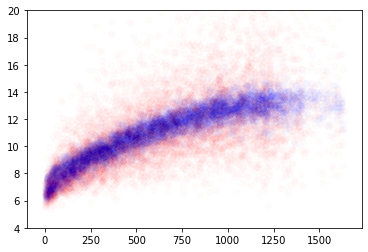

CPU times: user 952 ms, sys: 358 ms, total: 1.31 s
Wall time: 354 ms


In [17]:
%%time
linear = linear_model.LinearRegression()
fit_and_test_model(linear, x_train, x_test, y_train, y_test)

In [18]:
pd.DataFrame({'name':features.keys(), 'coef':linear.coef_})

,name,coef
0,team_id,6.280506e-04
1,team_id_log10,5.656698e-02
2,team_id_square,-2.422567e-07
3,leg_1,-4.535280e-02
4,leg_2,-3.169213e-03
5,leg_3,2.878222e-02
6,leg_4,1.973980e-02
7,c_EST,4.014702e-02
8,c_FIN,6.032230e-02
9,c_GBR,-1.479864e-02


      Iter       Train Loss   Remaining Time 
         1           0.0634           46.63s
         2           0.0584           43.09s
         3           0.0543           42.75s
         4           0.0509           42.83s
         5           0.0482           42.05s
         6           0.0460           42.18s
         7           0.0441           41.25s
         8           0.0426           40.57s
         9           0.0414           40.48s
        10           0.0403           40.67s
        20           0.0357           37.80s
        30           0.0343           34.54s
        40           0.0337           32.88s
        50           0.0333           31.34s
        60           0.0330           30.75s
        70           0.0329           29.32s
        80           0.0327           27.96s
        90           0.0326           27.04s
       100           0.0325           26.62s
       200           0.0319           20.68s
       300           0.0314           20.82s
       40

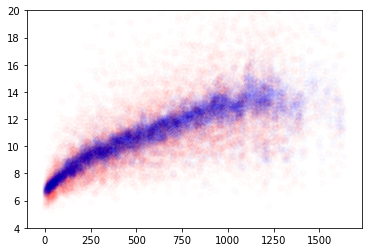

CPU times: user 46.7 s, sys: 175 ms, total: 46.9 s
Wall time: 46.7 s


In [19]:
%%time
gbr_num_estimators=1000
gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=gbr_num_estimators, random_state=0, verbose=1)

fit_and_test_model(gbr, x_train, x_test, y_train, y_test)

#print(f"feature_importances_: {gbr.feature_importances_}")
#gbr_features = pd.DataFrame({'feature':first_names.columns, 'importance': gbr.feature_importances_})
#gbr_features['feature'] = gbr_features['feature'].str.replace('top_first_name_','')
#display(gbr_features.sort_values(by="importance", ascending=False))

In [20]:
gbr_num_estimators_quantile=int(gbr_num_estimators/2)

      Iter       Train Loss   Remaining Time 
         1           0.0590           35.01s
         2           0.0565           34.92s
         3           0.0543           34.73s
         4           0.0524           35.25s
         5           0.0508           35.35s
         6           0.0493           35.72s
         7           0.0480           35.77s
         8           0.0469           36.13s
         9           0.0460           36.34s
        10           0.0453           36.22s
        20           0.0417           35.81s
        30           0.0407           36.23s
        40           0.0403           35.36s
        50           0.0401           33.72s
        60           0.0400           32.40s
        70           0.0399           30.77s
        80           0.0398           29.37s
        90           0.0397           28.04s
       100           0.0396           27.04s
       200           0.0393           18.33s
       300           0.0392           11.63s
       40

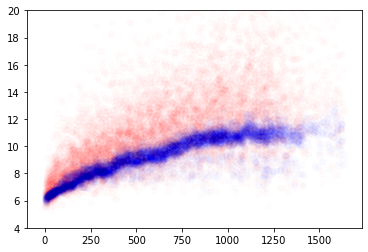

In [21]:
gbr_q_low = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.159, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_low, x_train, x_test, y_train, y_test)


      Iter       Train Loss   Remaining Time 
         1           0.0631           42.01s
         2           0.0611           43.74s
         3           0.0594           44.72s
         4           0.0578           44.38s
         5           0.0565           44.62s
         6           0.0553           45.16s
         7           0.0543           44.85s
         8           0.0534           44.56s
         9           0.0526           44.21s
        10           0.0519           43.95s
        20           0.0482           43.00s
        30           0.0470           40.00s
        40           0.0464           37.66s
        50           0.0461           34.83s
        60           0.0459           33.02s
        70           0.0457           31.44s
        80           0.0456           30.03s
        90           0.0455           28.63s
       100           0.0454           27.44s
       200           0.0451           18.82s
       300           0.0451           11.64s
       40

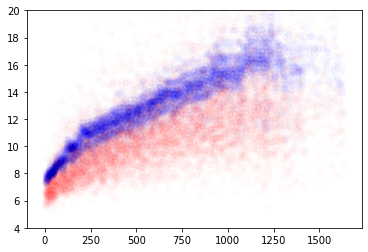

In [22]:
gbr_q_high = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.841, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_high, x_train, x_test, y_train, y_test)



In [23]:
joblib.dump(gbr, f'gbr_{ve_or_ju}.sav')
joblib.dump(gbr_q_low, f'gbr_q_low_{ve_or_ju}.sav')
joblib.dump(gbr_q_high, f'gbr_q_high_{ve_or_ju}.sav')


['gbr_q_high_ve.sav']

In [24]:
gbr_preds = gbr.predict(pd.DataFrame(x_test))
gbr_q_low_preds = gbr_q_low.predict(pd.DataFrame(x_test))
gbr_q_high_preds = gbr_q_high.predict(pd.DataFrame(x_test))

In [25]:
gbr_q_pred_errors = pd.DataFrame({
    'q_low':np.exp(gbr_q_low_preds),
    'true':np.exp(y_test).ravel(), 
    'predicted':np.exp(gbr_preds), 
    'q_high':np.exp(gbr_q_high_preds), 
})

gbr_q_pred_errors["q_low_error"] = gbr_q_pred_errors.true < gbr_q_pred_errors.q_low
gbr_q_pred_errors["q_high_error"] = gbr_q_pred_errors.true > gbr_q_pred_errors.q_high
gbr_q_pred_errors["q_error"] = np.logical_or(gbr_q_pred_errors.q_low_error, gbr_q_pred_errors.q_high_error)
gbr_q_pred_errors["q_interval"] = gbr_q_pred_errors.q_high - gbr_q_pred_errors.q_low


gbr_q_pred_errors["std"] = (gbr_q_pred_errors.q_high - gbr_q_pred_errors.q_low) / 2
# Intentionally don't use log scale for calculation to get bigger std
# TODO IS this causing big std in Bayesian models? :(
gbr_q_pred_errors["std_correct"] = np.exp((gbr_q_high_preds - gbr_q_low_preds) / 2)
gbr_q_pred_errors["abs_error"] = np.abs(gbr_q_pred_errors.predicted - gbr_q_pred_errors.true)
gbr_q_pred_errors["abs_error_in_stds"] = gbr_q_pred_errors.abs_error / np.exp(gbr_q_pred_errors["std_correct"])

gbr_reports = [
    f'q_low_error.mean {gbr_q_pred_errors.q_low_error.mean().round(4)}',
    f'q_high_error.mean {gbr_q_pred_errors.q_high_error.mean().round(4)}',
    f'q_error.mean {gbr_q_pred_errors.q_error.mean().round(4)}',

    f'q_interval.mean {gbr_q_pred_errors.q_interval.mean().round(4)}',
    f'q_interval.median {gbr_q_pred_errors.q_interval.median().round(4)}',

    f'std.mean {gbr_q_pred_errors["std"].mean().round(4)}',
    f'std_correct.mean {gbr_q_pred_errors["std_correct"].mean().round(4)}',
    f'abs_error_in_stds.mean {gbr_q_pred_errors["abs_error_in_stds"].mean().round(4)}',
    f'abs_error.mean {gbr_q_pred_errors["abs_error"].mean().round(4)}',
    f'abs_error.median {gbr_q_pred_errors["abs_error"].median().round(4)}'
]


display(gbr_q_pred_errors.tail(15).round(3))
display(gbr_reports)


,q_low,true,predicted,q_high,q_low_error,q_high_error,q_error,q_interval,std,std_correct,abs_error,abs_error_in_stds
7967,7.912,7.500,9.020,10.341,True,False,True,2.429,1.215,1.143,1.520,0.485
7968,6.316,7.761,7.019,7.858,False,False,False,1.542,0.771,1.115,0.742,0.243
7969,10.732,14.444,13.679,16.110,False,False,False,5.378,2.689,1.225,0.765,0.225
7970,7.775,8.949,8.843,9.910,False,False,False,2.135,1.067,1.129,0.106,0.034
7971,6.831,6.789,7.592,8.449,True,False,True,1.617,0.809,1.112,0.803,0.264
7972,7.781,8.600,8.422,9.735,False,False,False,1.954,0.977,1.119,0.178,0.058
7973,11.163,12.657,13.393,15.612,False,False,False,4.450,2.225,1.183,0.736,0.226
7974,8.997,9.333,11.128,12.749,False,False,False,3.752,1.876,1.190,1.795,0.546
7975,11.011,9.621,12.957,15.452,True,False,True,4.441,2.221,1.185,3.336,1.020
7976,7.114,8.868,8.102,9.936,False,False,False,2.821,1.411,1.182,0.766,0.235


['q_low_error.mean 0.1681',
 'q_high_error.mean 0.1601',
 'q_error.mean 0.3282',
 'q_interval.mean 3.868',
 'q_interval.median 3.7273',
 'std.mean 1.934',
 'std_correct.mean 1.1853',
 'abs_error_in_stds.mean 0.4858',
 'abs_error.mean 1.6057',
 'abs_error.median 1.1895']

In [26]:
reports.extend(gbr_reports)

In [27]:
gbr_q_pred_errors[['q_error', "q_low", "q_high", "q_interval", "abs_error", "std"]].groupby('q_error').agg(["median"]).round(2)

,q_low,q_high,q_interval,abs_error,std
,median,median,median,median,median
q_error,,,,,
False,9.41,13.25,3.72,0.77,1.86
True,9.47,13.34,3.74,2.64,1.87


In [28]:
endTime = time.time()
reports.append(f"runtime {round(((endTime - startTime)/ 60), 2)} mins")
shared.write_simple_text_report(reports, f'preprocess_priors_{ve_or_ju}.txt')

In [31]:
import datetime
datetime.datetime.now()

datetime.datetime(2019, 10, 29, 21, 8, 23, 178333)

In [29]:
%%date

UsageError: Cell magic `%%date` not found.


In [ ]:
STOP_HERE

In [ ]:
import os
#os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.environ['THEANO_FLAGS'] = 'device=cpu'
#os.environ['THEANO_FLAGS'] = 'device=cuda,floatX=float32,force_device=True'

import pymc3 as pm
import pmlearn
from pmlearn.linear_model import LinearRegression
print('Running on pymc-learn v{}'.format(pmlearn.__version__))


In [ ]:
import multiprocessing
multiprocessing.cpu_count()

In [ ]:

pmlearn_linear = LinearRegression()
fit_params={
    "inference_type": "nuts",
    "inference_args": {
        "cores": multiprocessing.cpu_count() -1,
        #"chains":2,
        "init": 'adapt_diag',
        #"tune": 2000,
        "target_accept": 0.9999
    }
}
fit_and_test_model(pmlearn_linear, pd.DataFrame(data=x_train), pd.DataFrame(x_test), y_train, y_test,fit_params)

In [ ]:
pmlearn_preds = pmlearn_linear.predict(pd.DataFrame(x_test), return_std=True)

In [ ]:

joblib.dump(pmlearn_linear, 'pmlearn_linear.sav')

In [ ]:
pred_errors = pd.DataFrame({
    'mean':np.exp(pmlearn_preds[0]), 
    'std':np.exp(pmlearn_preds[1]), 
    'true':np.exp(y_test).ravel(), 
    'error':np.abs(np.exp(y_test).ravel() -np.exp(pmlearn_preds[0])) / np.exp(pmlearn_preds[1])
})
display(pred_errors.head(15))
pred_errors.error.mean()

In [ ]:
pmlearn_linear.plot_elbo()

In [ ]:
pm.traceplot(pmlearn_linear.trace)

In [ ]:
pm.forestplot(pmlearn_linear.trace, varnames=["betas", "alpha", "s"]);

In [ ]:
summary_df = pm.summary(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])
summary_df

In [ ]:
pm.plot_posterior(pmlearn_linear.trace, varnames=["betas", "alpha", "s"],
                 figsize = [14, 8])

In [ ]:
pm.gelman_rubin(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])